In [1]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from joblib import dump
from joblib import load


In [2]:
# Chemins des fichiers CSV
train_file_path = 'Datasets/train.csv'
test_file_path = 'Datasets/test.csv'

# Chargement des données d'entraînement et de test dans des DataFrames pandas
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Affichage des cinq premières lignes du jeu de données d'entraînement
print("Train Data:")
print(train_data.head())


# Affichage des cinq premières lignes du jeu de données de test
print("\nTest Data:")
print(test_data.head())

Train Data:
       mean        sd
0  0.564877  0.231592
1 -0.118285  0.020446
2 -0.157953 -0.106749
3 -0.157953 -0.106749
4 -0.157953 -0.106242

Test Data:
       mean        sd
0 -0.157953 -0.106749
1 -0.157953 -0.106749
2 -0.157953 -0.106242
3 -0.284889 -0.106749
4 -0.157953 -0.106242


In [3]:
# Créer une instance du modèle Isolation Forest
model = IsolationForest(random_state=16)

# Entraîner le modèle avec le jeu de données d'entraînement
model.fit(train_data[['mean', 'sd']])


IsolationForest(random_state=16)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


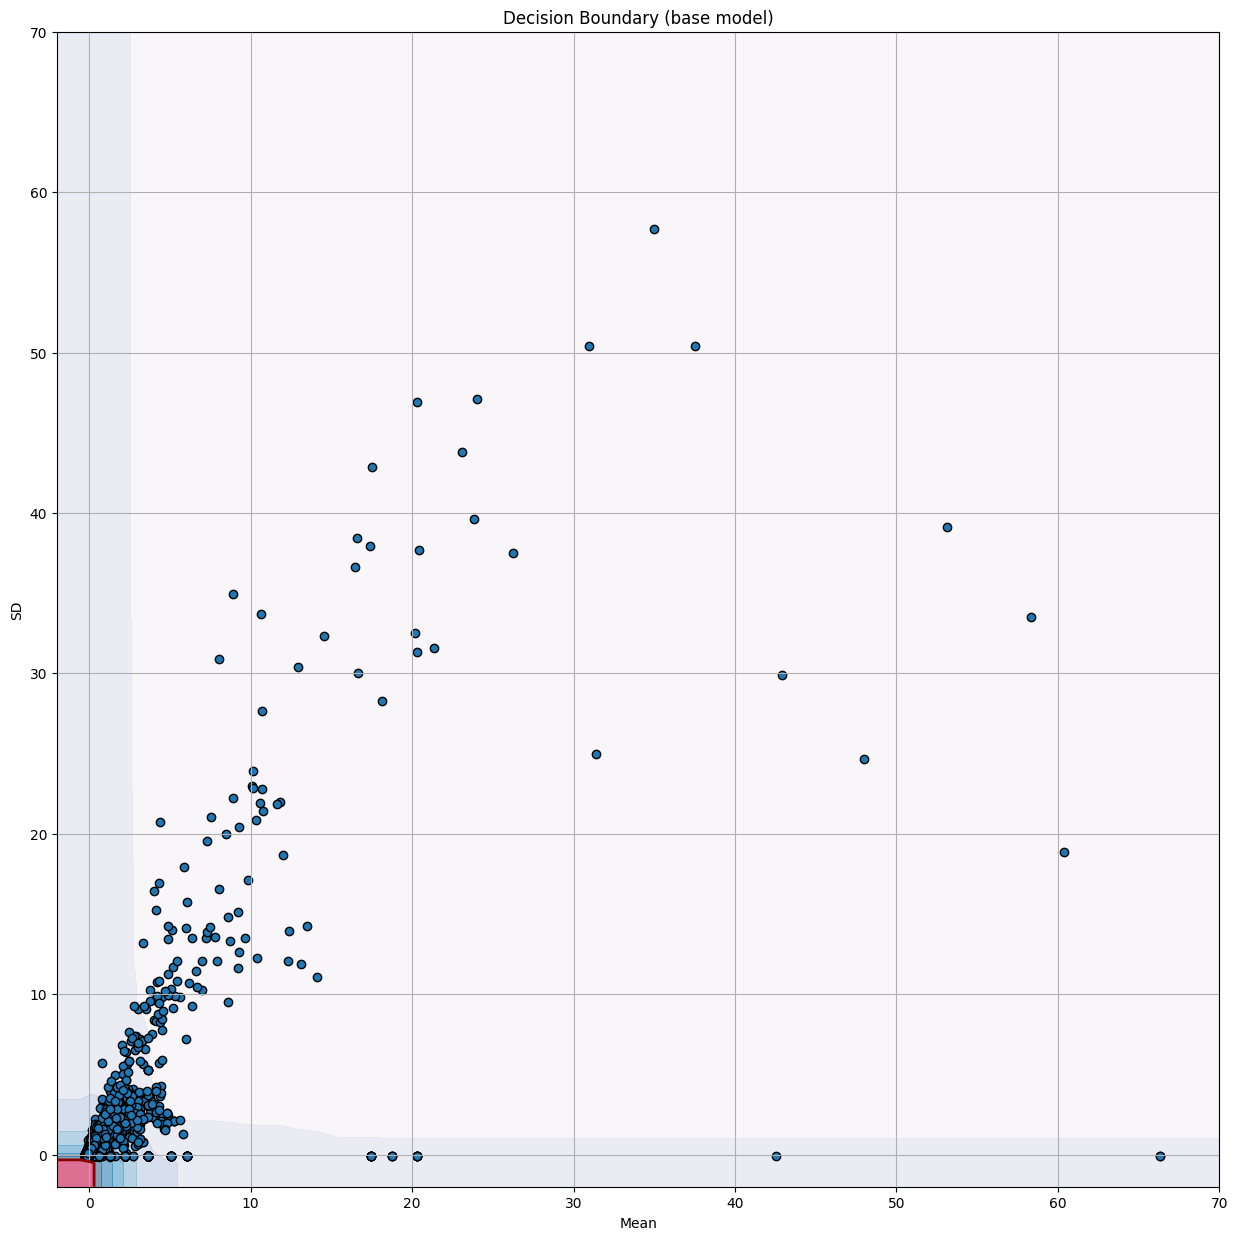

In [4]:
# Change the plot's size.
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draws the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draws the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draws the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(train_data['mean'], train_data['sd'], edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()


In [6]:
# Création d'une nouvelle instance du modèle Isolation Forest avec un random_state de 16 et une contamination de 0.1%
clf = IsolationForest(random_state=16, contamination=0.001)

# Entraînement du modèle avec l'ensemble d'apprentissage
clf.fit(train_data[['mean', 'sd']])

# Affichage du modèle entraîné
clf


/usr/local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.001, random_state=16)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


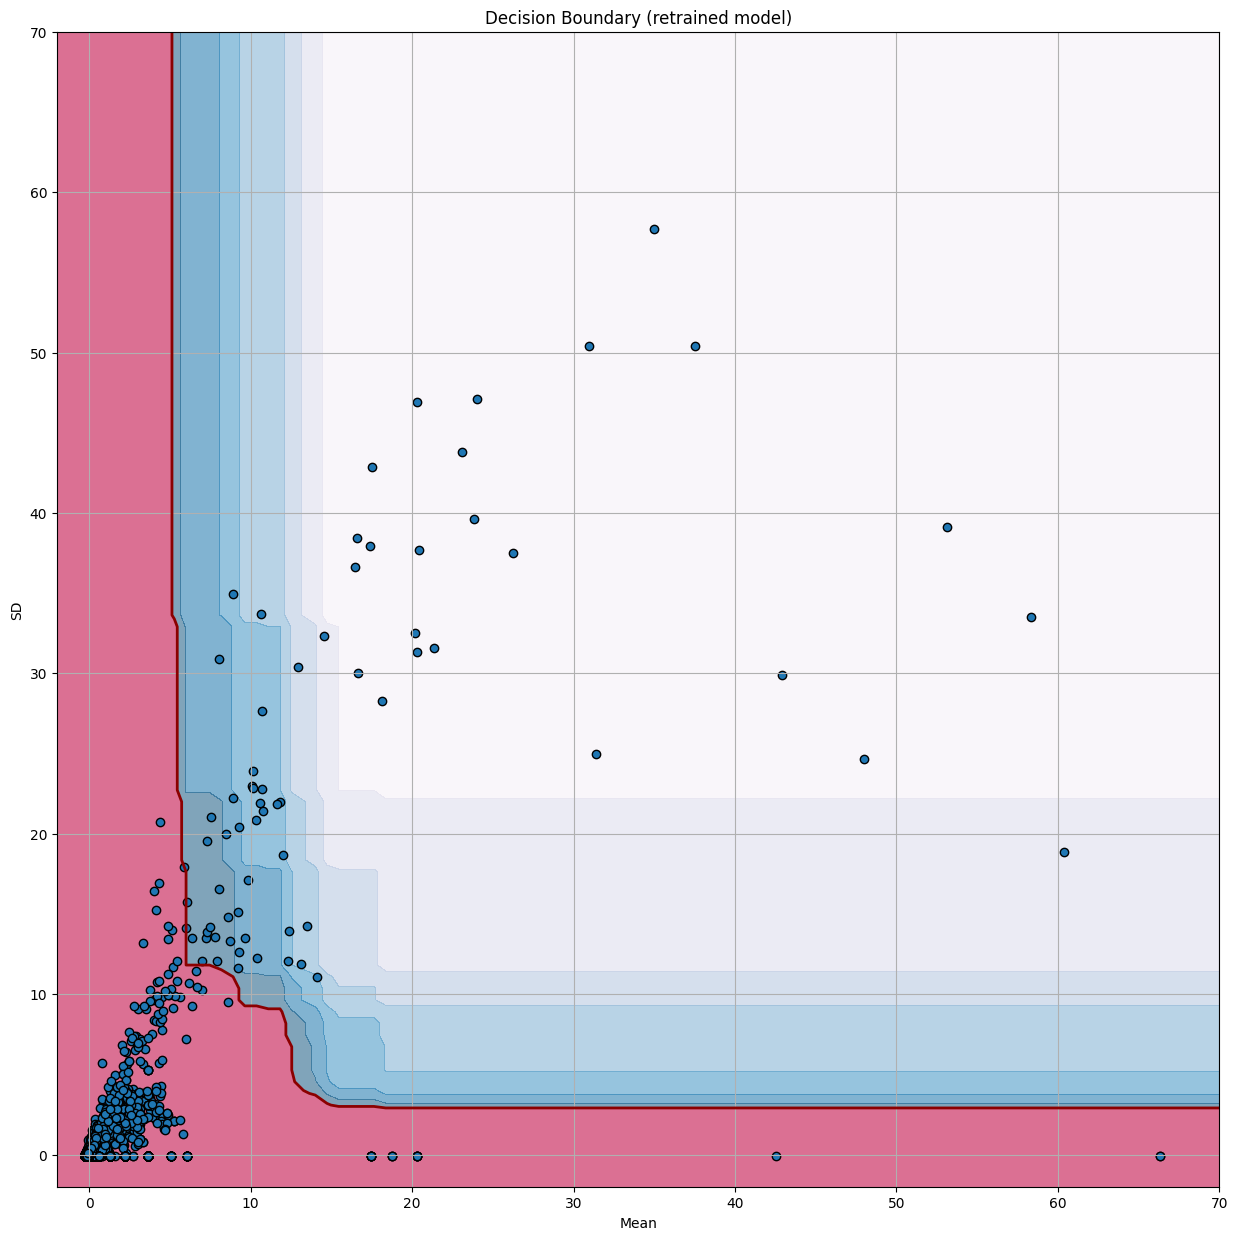

In [7]:
# Change the plot's size.
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (retrained model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(train_data['mean'], train_data['sd'], edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()


In [11]:
# Utilisez la méthode predict avec le jeu de données de test
test_predictions = clf.predict(test_data[['mean', 'sd']])

# Affichez les prédictions
print(test_predictions)


[1 1 1 ... 1 1 1]


/usr/local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


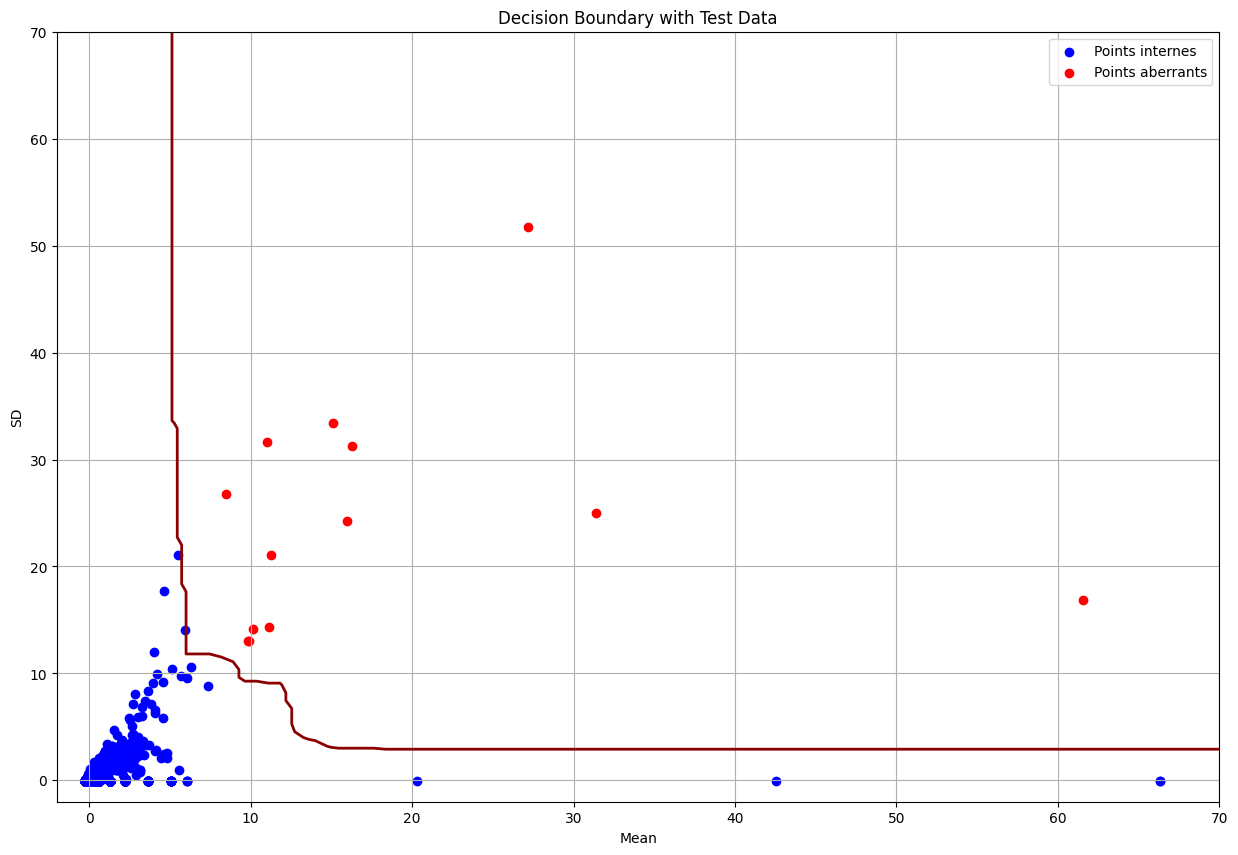

In [15]:
# Fusionnez le jeu de données de test avec les prédictions
test_data_with_predictions = pd.concat([test_data, pd.Series(test_predictions, name='predictions')], axis=1)

# Tracé de la limite de décision avec les données de test
plt.figure(figsize=(15, 10))

# Tracé de la limite de décision
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Tracé des courbes de niveau
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')

# Tracé des points internes (prédictions = 1) en bleu
plt.scatter(test_data_with_predictions.loc[test_data_with_predictions['predictions'] == 1, 'mean'],
            test_data_with_predictions.loc[test_data_with_predictions['predictions'] == 1, 'sd'],
            c='blue', label='Points internes')

# Tracé des points aberrants (prédictions = -1) en rouge
plt.scatter(test_data_with_predictions.loc[test_data_with_predictions['predictions'] == -1, 'mean'],
            test_data_with_predictions.loc[test_data_with_predictions['predictions'] == -1, 'sd'],
            c='red', label='Points aberrants')

plt.title("Decision Boundary with Test Data")
plt.xlabel('Mean')
plt.ylabel('SD')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# Exportez le modèle
dump(clf, 'model.joblib')


['model.joblib']

In [7]:
# Charger le modèle
loaded_model = load('model.joblib')

# Créer une nouvelle observation avec des valeurs pour 'mean' et 'sd'
new_data = pd.DataFrame({'mean': [9.5648 ], 'sd': [-2.106749]})

# Faire des prédictions avec le modèle chargé
predictions = loaded_model.predict(new_data[['mean', 'sd']])

# Afficher les prédictions
print("predictions: ", predictions)


predictions:  [1]
